# Analyzing Beijing's PM2.5 Air Pollution Trends: A Regression-Based Approach

## What is PM2.5?

- PM2.5 air pollution refers to the presence of fine particulate matter in the air that is 2.5 micrometers or smaller in diameter.
- These particles can come from various sources such as vehicle exhaust, industrial emissions, and wildfires, and can have negative impacts on human health.

## About Project

The purpose of this data set is to monitor and analyze the air quality in Beijing over time, identify trends, and assess the effectiveness of pollution control measures.

## Downloading dataset from kaggle

In [1]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/datasets/ineubytes/pm25-airpolution-dataset"
od.download(dataset_url)

Skipping, found downloaded files in ".\pm25-airpolution-dataset" (use force=True to force download)


# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import missingno

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Remove warnings
import warnings 
warnings.filterwarnings('ignore')

# 2. Loading the dataset

In [3]:
data = pd.read_csv("pm25-airpolution-dataset/PRSA_data_2010.1.1-2014.12.31.csv")

# 3. Exploratory Data Analysis(EDA)

In [4]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [6]:
# columns of dataset
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

**About this variables:-**
- **No:** row number
- **year:** year of data in this row
- **month:** month of data in this row
- **day:** day of data in this row
- **hour:** hour of data in this row
- **pm2.5:** PM2.5 concentration (ug/m^3)
- **DEWP:** Dew Point (â„ƒ)
- **TEMP:** Temperature (â„ƒ)
- **PRES:** Pressure (hPa)
- **cbwd:** Combined wind direction
- **Iws:** Cumulated wind speed (m/s)
- **Is:** Cumulated hours of snow
- **Ir:** Cumulated hours of rain

In [7]:
data.shape

(43824, 13)

- the dataset contains 13 columns and 43824 rows data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


- The datatypes available in dataset are integer, float, and object. This shows that data have categorical variable in it.

In [10]:
data.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [11]:
# Calulating percentage of missing data
((data.isnull().sum())/len(data))*100

No       0.000000
year     0.000000
month    0.000000
day      0.000000
hour     0.000000
pm2.5    4.716594
DEWP     0.000000
TEMP     0.000000
PRES     0.000000
cbwd     0.000000
Iws      0.000000
Is       0.000000
Ir       0.000000
dtype: float64

- Total aprrox 5 percent values in pm2.5 dependent varible is missing.

<Axes: >

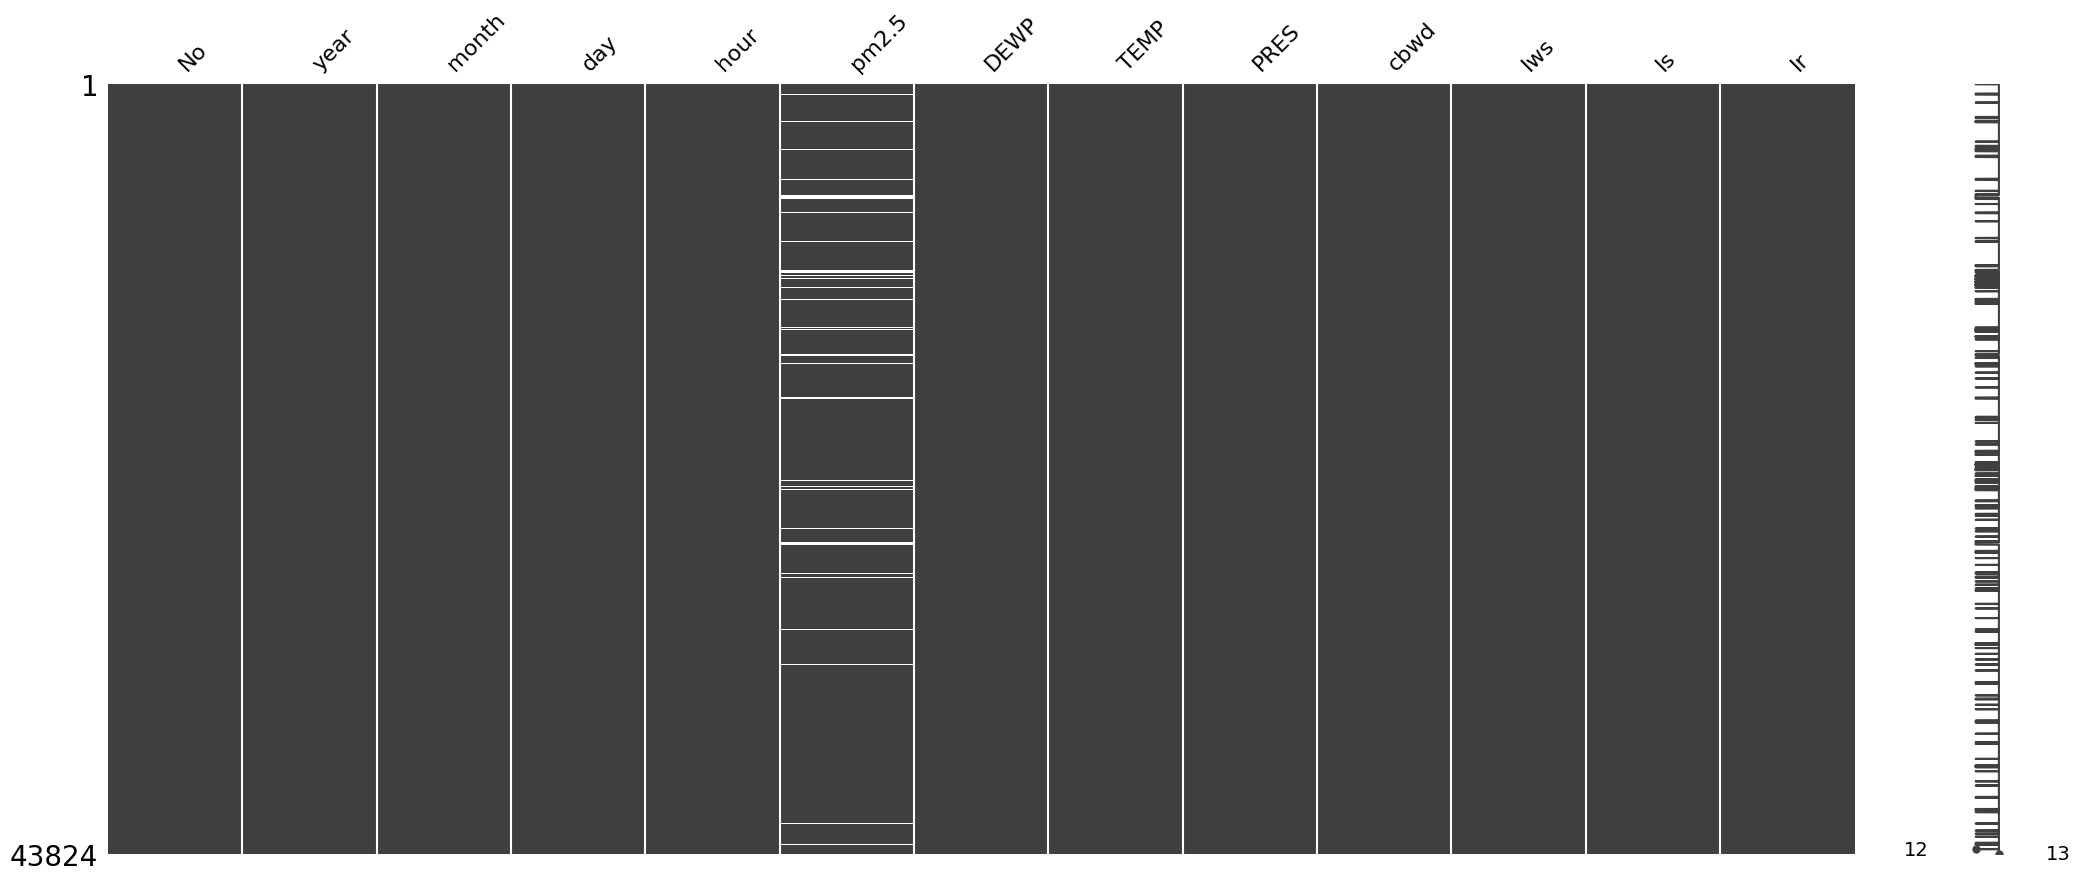

In [12]:
# Missing data in dataset

missingno.matrix(data)

In [13]:
data.drop(['No', 'year', 'month', 'day', 'hour','cbwd'],axis=1).describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


**Conclusion:**
- In the dataset some columns we can remove during model building like no, year, month, day, and hour.
- There are some columns that have categorical data which need encoding.
- From column pm2.5 some values are missing which needs an imputation process to remove missing values.

In [14]:
data['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

Text(0.5, 1.0, 'Combined wind direction')

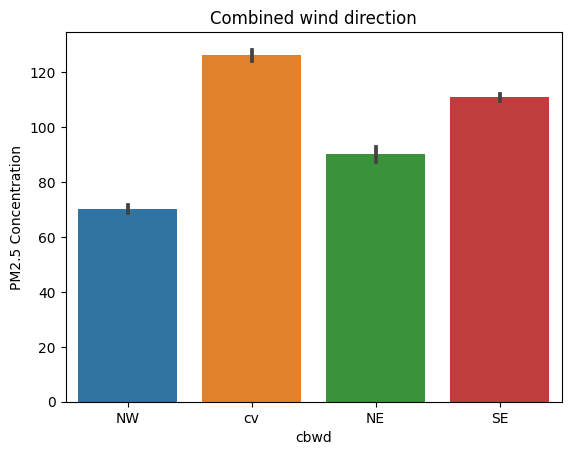

In [15]:
sns.barplot(x = 'cbwd', y ='pm2.5', data = data)
plt.ylabel('PM2.5 Concentration')
plt.title('Combined wind direction')

In [16]:
corr = data.drop(['No', 'year', 'month', 'day', 'hour','cbwd'],axis=1).corr()
corr

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
pm2.5,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
DEWP,0.171423,1.000000,0.824633,-0.778346,-0.296399,-0.034410,0.125090
TEMP,-0.090534,0.824633,1.000000,-0.826690,-0.154623,-0.092601,0.049121
PRES,-0.047282,-0.778346,-0.826690,1.000000,0.185355,0.069028,-0.079843
Iws,-0.247784,-0.296399,-0.154623,0.185355,1.000000,0.021883,-0.010122
Is,0.019266,-0.034410,-0.092601,0.069028,0.021883,1.000000,-0.009548
Ir,-0.051369,0.125090,0.049121,-0.079843,-0.010122,-0.009548,1.000000


<Axes: >

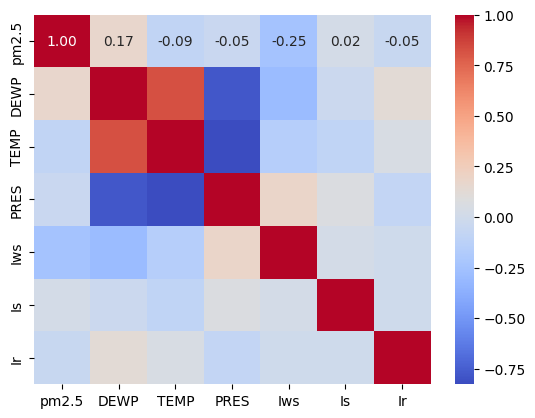

In [17]:
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm')

In [18]:
corr = corr.abs()
us_corr = (corr.unstack()).sort_values(ascending=False)
us_corr = us_corr[(us_corr<1) & (us_corr>0.4)].drop_duplicates().to_frame()
us_corr.columns = ['correlation']
us_corr

,,correlation
PRES,TEMP,0.826690
TEMP,DEWP,0.824633
DEWP,PRES,0.778346


**Conclusion:**
- By evaluating the correlation values we can say columns like PRES, TEMP and DEWP have a strong relation between each other.

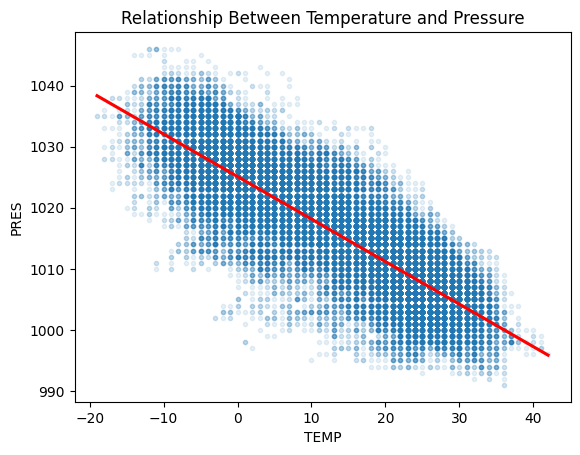

In [19]:
sns.regplot(x='TEMP', y='PRES', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"r"})
plt.title('Relationship Between Temperature and Pressure')
plt.show()

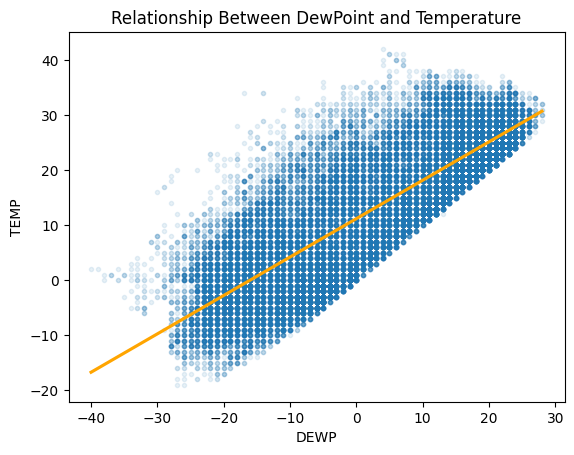

In [20]:
sns.regplot(x='DEWP', y='TEMP', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between DewPoint and Temperature')
plt.show()

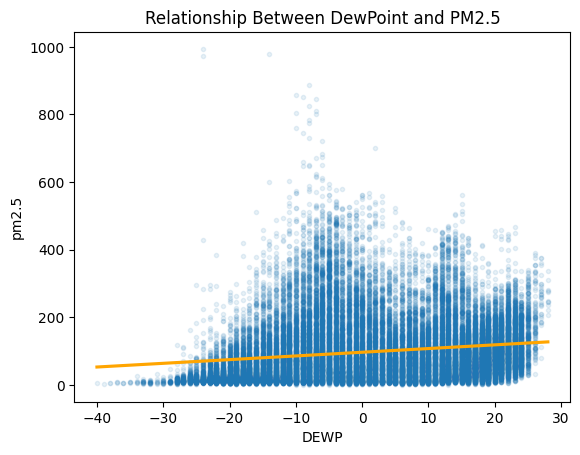

In [21]:
sns.regplot(x='DEWP', y='pm2.5', data=data, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"orange"})
plt.title('Relationship Between DewPoint and PM2.5')
plt.show()

**Conclusion:**
- The relationship Between Temperature and Pressure is inversely proportional.
- When the  temperature increases then the pressure will decrease.
- The relationship Between DewPoint and Temperature is directly proportional.

<Axes: xlabel='year', ylabel='pm2.5'>

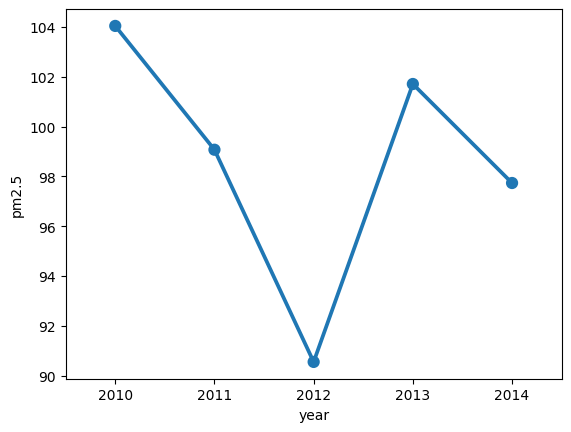

In [22]:
# Yearly pm2.5 mean
df = data[["pm2.5", 'year']].groupby(["year"]).mean().reset_index().sort_values(by='year', ascending=False)
sns.pointplot(x='year', y='pm2.5', data=df)   

<Axes: xlabel='month', ylabel='pm2.5'>

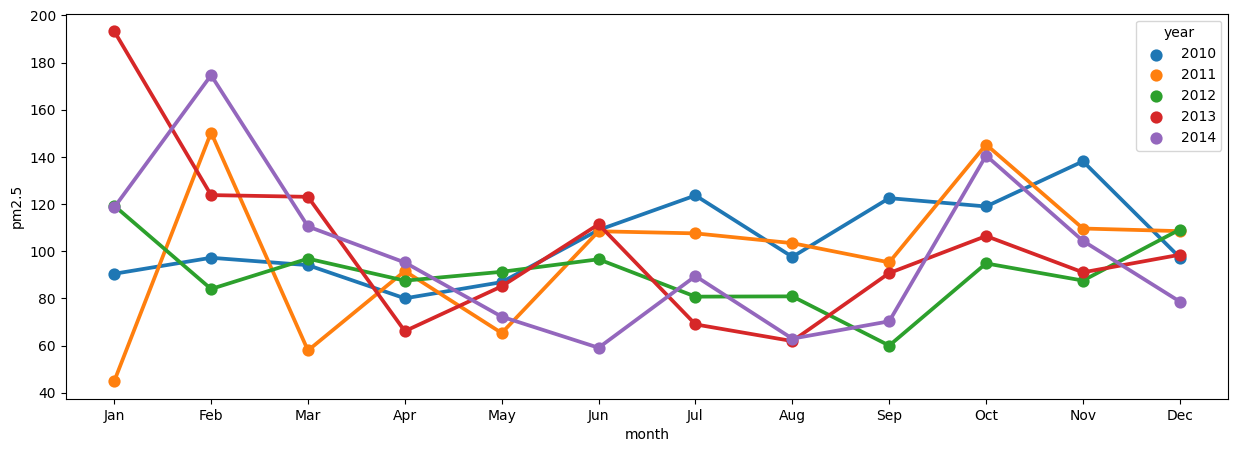

In [23]:
# Montly means for every year
copy_data = data.copy()
copy_data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)

df = copy_data[['pm2.5', 'month', 'year']].groupby(["year","month"]).mean().reset_index().sort_values(by=['year', 'month'], ascending=True)

custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
df = df.iloc[df['month'].map(custom_dict).argsort()]

plt.subplots(figsize=(15,5))
sns.pointplot(x='month', y='pm2.5', data=df, hue='year' )

# 4. Data preprocessing

In [ ]:
#dropping duplicate values

data=data.drop_duplicates()

In [24]:
# removing columns and new index
import datetime

data['time'] = data.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
data.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)
data = data.set_index('time')
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Text(0.5, 1.0, 'PM2.5 airpollution distribution')

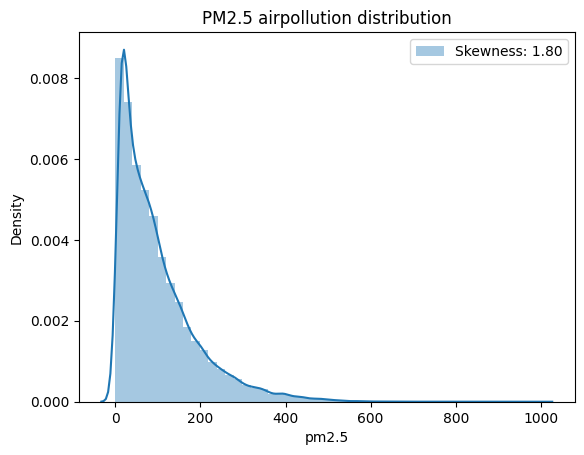

In [25]:
sns.distplot(data['pm2.5'], label = 'Skewness: %.2f'%(data['pm2.5'].skew()))
plt.legend(loc = 'best')
plt.title('PM2.5 airpollution distribution')

In [26]:
# Apply log transformation to Fare column to reduce skewness

data['pm2.5'] = data['pm2.5'].map(lambda x: np.log(x) if x > 0 else 0)

In [54]:
# drop the rows directly -> mess up the order
# first 24 rows have pm2.5 value that is NaN -> discard
# else: forward filling
data = data[24:].fillna(method='ffill')
print("Null values in pm2.5 variable: ", data['pm2.5'].isnull().sum())

Null values in pm2.5 variable:  0


In [28]:
# One-Hot Encoding
data_encode = pd.get_dummies(data, columns=['cbwd'])
data = data_encode.astype(int)
data.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
time,,,,,,,,,,,
2010-01-02 00:00:00,4,-16,-4,1020,1,0,0,0,0,1,0
2010-01-02 01:00:00,4,-15,-4,1020,2,0,0,0,0,1,0
2010-01-02 02:00:00,5,-11,-5,1021,3,0,0,0,0,1,0
2010-01-02 03:00:00,5,-7,-5,1022,5,1,0,0,0,1,0
2010-01-02 04:00:00,4,-7,-5,1022,6,2,0,0,0,1,0


In [29]:
# create input and output
X = data.drop('pm2.5', axis = 1)
Y = data['pm2.5']

X.shape, Y.shape

((43800, 10), (43800,))

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=128)

In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(30660, 10) (30660,)
(13140, 10) (13140,)


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [35]:
# Function to calculate Score for test and train

def score_matrix(y1,y2,y3,y4):
	# y1 = y_train, y2 = y_train_pred, y3 = y_test, y4 = y_test_pred
    
    # Calculate metrics for Train Data
    mae_score = mean_absolute_error(y1, y2)
    mse_score = mean_squared_error(y1, y2)
    rmse_score = np.sqrt(mean_squared_error(y1, y2))
    
    
    print("Training Performance:")
    print(f"Mean Absolute Error (MAE): {mae_score}")
    print(f"Mean Squared Error (MSE): {mse_score}")
    print(f"Root Mean Squared Error (RMSE): {rmse_score}")
   
    print('='*60)
    
    # Calculate metrics for Test data
    mae_score = mean_absolute_error(y3, y4)
    mse_score = mean_squared_error(y3, y4)
    rmse_score = np.sqrt(mean_squared_error(y3, y4))
    
    print("Test Performance:")
    print(f"Mean Absolute Error (MAE): {mae_score}")
    print(f"Mean Squared Error (MSE): {mse_score}")
    print(f"Root Mean Squared Error (RMSE): {rmse_score}")
    return

In [36]:
linearRegression=LinearRegression()
linearRegression.fit(X_train, y_train)

y_train_pred = linearRegression.predict(X_train)  # Make predictions on the training data
y_test_pred = linearRegression.predict(X_test)  # Make predictions on the test data

In [37]:
score_matrix(y_train,y_train_pred,y_test,y_test_pred)

Training Performance:
Mean Absolute Error (MAE): 0.8177067213948997
Mean Squared Error (MSE): 1.2806155010793658
Root Mean Squared Error (RMSE): 1.131642832822868
Test Performance:
Mean Absolute Error (MAE): 0.8171730697356414
Mean Squared Error (MSE): 1.2704878482113815
Root Mean Squared Error (RMSE): 1.1271591938193033


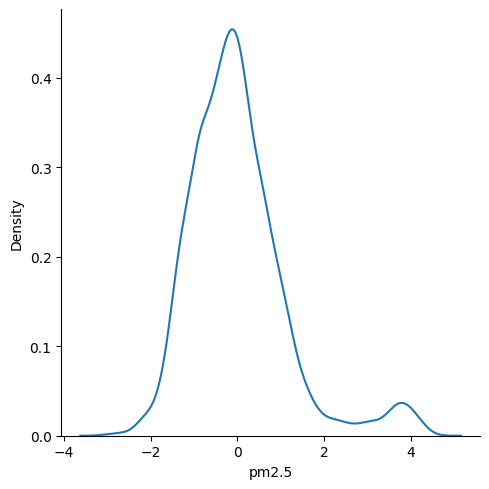

In [40]:
sns.displot(y_test_pred-y_test, kind = 'kde')

Best Ridge Alpha: 1
Ridge Mean Squared Error: 1.2708276701945256
Ridge Mean Absolute Error: 0.8172664977024042
Ridge Root Mean Squared Error: 1.127309926415325

Best Lasso Alpha: 0.001
Lasso Mean Squared Error: 1.270712892760937
Lasso Mean Absolute Error: 0.8173574430311006
Lasso Root Mean Squared Error: 1.1272590176001862


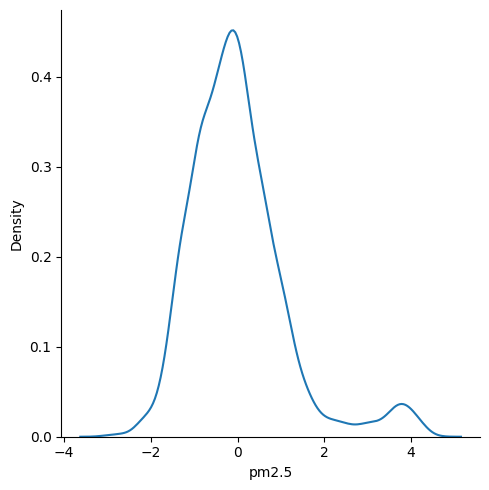

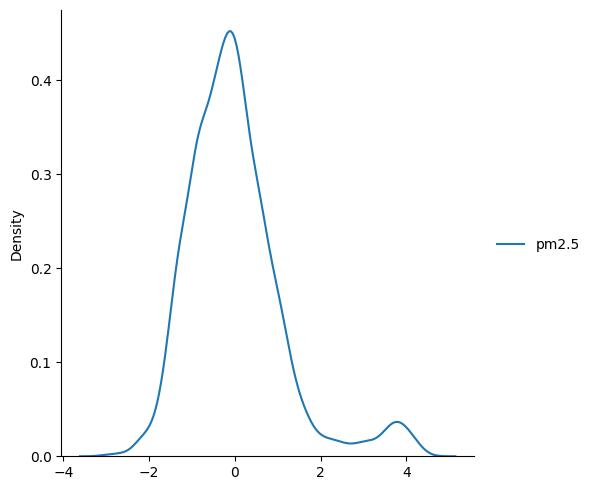

In [50]:
from sklearn.linear_model import Ridge, Lasso

# Create Ridge Regression model
ridge = Ridge()

# Define the hyperparameter grid to search for Ridge
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization parameter
}

# Create Lasso Regression model
lasso = Lasso()

# Define the hyperparameter grid to search for Lasso
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization parameter
}

# Create GridSearchCV objects with cross-validation
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, 
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, 
                                 cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_alpha_lasso = grid_search_lasso.best_params_['alpha']

# Create Ridge and Lasso models with the best hyperparameters
best_ridge = Ridge(alpha=best_alpha_ridge)
best_lasso = Lasso(alpha=best_alpha_lasso)

# Fit the models with the best hyperparameters to the training data
best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)

# Evaluate the models on the test data
y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)

# Calculate evaluation metrics (e.g., MSE, MAE, RMSE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

print("Best Ridge Alpha:", best_alpha_ridge)
print("Ridge Mean Squared Error:", mse_ridge)
print("Ridge Mean Absolute Error:", mae_ridge)
print("Ridge Root Mean Squared Error:", rmse_ridge)
sns.displot(y_pred_ridge-y_test, kind = 'kde')

print("\nBest Lasso Alpha:", best_alpha_lasso)
print("Lasso Mean Squared Error:", mse_lasso)
print("Lasso Mean Absolute Error:", mae_lasso)
print("Lasso Root Mean Squared Error:", rmse_lasso)
sns.displot([y_pred_lasso-y_test], kind = 'kde')

In [44]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)  # Make predictions on the training data
y_test_pred = random_forest.predict(X_test)  # Make predictions on the test data

In [45]:
score_matrix(y_train,y_train_pred,y_test,y_test_pred)

Training Performance:
Mean Absolute Error (MAE): 0.2905450795471832
Mean Squared Error (MSE): 0.18828937327946038
Root Mean Squared Error (RMSE): 0.4339232343162329
Test Performance:
Mean Absolute Error (MAE): 0.7494188995745502
Mean Squared Error (MSE): 1.1370650499715067
Root Mean Squared Error (RMSE): 1.0663325231706602


Root Mean Squared Error (RMSE): 1.0672876925532502


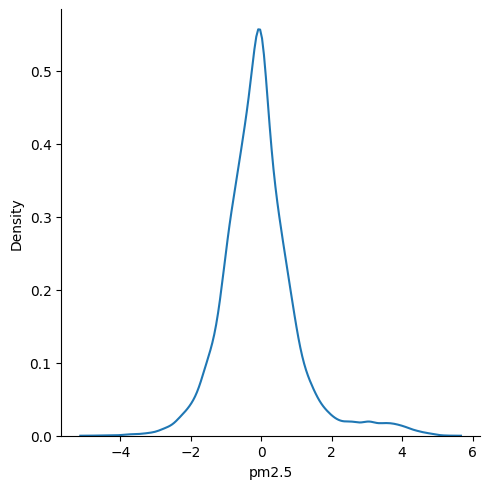

In [48]:
# Define your RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

rf_regressor.fit(X_train, y_train)  # X_train and y_train are your training data

y_test_pred = rf_regressor.predict(X_test)  # X_test is your testing data

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation results
print("Root Mean Squared Error (RMSE):", rmse)
sns.displot(y_test_pred-y_test, kind = 'kde')